In [ ]:
url = '/content/indian_liver_patient.csv'

In [ ]:
import pandas as pd

data = pd.read_csv(url)
data.shape
data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Filtering of the data showed us that there exists 4 null values in the Albumin and Globulin Ratio column


In [ ]:
#Describe gives statistical information about NUMERICAL columns in the dataset
data.describe(include='all')
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [ ]:
#Which features are available in the dataset?
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
#Check for any null values
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
data.dropna(subset = ["Albumin_and_Globulin_Ratio"], inplace=True)

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
del data['Gender']

In [ ]:
X1 = data.loc[:,'Age':'Albumin_and_Globulin_Ratio']
y1 = data['Dataset']
X1.shape

X1

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


How PCA uses concept of eigendecomposition?

Say, we have a dataset with ‘n’ predictor variables. We center the predictors to their respective means and then get an n x n covariance matrix. This covariance matrix is then decomposed into eigenvalues and eigenvectors.

In [ ]:
def dot_prod(A, v):
  dotproduct=0
  for i,j in zip(A,v):
	  dotproduct += i*j
  return dotproduct

In [ ]:
import numpy as np
from numpy.core import atleast_1d, transpose
from numpy.core.numeric import (
    ones, zeros, arange, array, asarray, asanyarray,
    ndarray, around, floor, ceil, dot, where,
    integer, isscalar, absolute
    )
from numpy.core.fromnumeric import (mean, sum)

def average(a, axis=None, weights=None, returned=False):

    a = np.asanyarray(a)

    if weights is None:
        avg = a.mean(axis)
        scl = avg.dtype.type(a.size/avg.size)
    else:
        wgt = np.asanyarray(weights)

        if issubclass(a.dtype.type, (np.integer, np.bool_)):
            result_dtype = np.result_type(a.dtype, wgt.dtype, 'f8')
        else:
            result_dtype = np.result_type(a.dtype, wgt.dtype)

        # Sanity checks
        if a.shape != wgt.shape:
            if axis is None:
                raise TypeError(
                    "Axis must be specified when shapes of a and weights "
                    "differ.")
            if wgt.ndim != 1:
                raise TypeError(
                    "1D weights expected when shapes of a and weights differ.")
            if wgt.shape[0] != a.shape[axis]:
                raise ValueError(
                    "Length of weights not compatible with specified axis.")

            # setup wgt to broadcast along axis
            wgt = np.broadcast_to(wgt, (a.ndim-1)*(1,) + wgt.shape)
            wgt = wgt.swapaxes(-1, axis)

        scl = wgt.sum(axis=axis, dtype=result_dtype)
        if np.any(scl == 0.0):
            raise ZeroDivisionError(
                "Weights sum to zero, can't be normalized")

        avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl

    if returned:
        if scl.shape != avg.shape:
            scl = np.broadcast_to(scl, avg.shape).copy()
        return avg, scl
    else:
        return avg


def cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None,
        aweights=None):
   
    if ddof is not None and ddof != int(ddof):
        raise ValueError(
            "ddof must be integer")

    # Handles complex arrays too
    m = np.asarray(m)
    if m.ndim > 2:
        raise ValueError("m has more than 2 dimensions")

    if y is None:
        dtype = np.result_type(m, np.float64)
    else:
        y = np.asarray(y)
        if y.ndim > 2:
            raise ValueError("y has more than 2 dimensions")
        dtype = np.result_type(m, y, np.float64)

    X = array(m, ndmin=2, dtype=dtype)
    if not rowvar and X.shape[0] != 1:
        X = X.T
    if X.shape[0] == 0:
        return np.array([]).reshape(0, 0)
    if y is not None:
        y = array(y, copy=False, ndmin=2, dtype=dtype)
        if not rowvar and y.shape[0] != 1:
            y = y.T
        X = np.concatenate((X, y), axis=0)

    if ddof is None:
        if bias == 0:
            ddof = 1
        else:
            ddof = 0

    # Get the product of frequencies and weights
    w = None
    if fweights is not None:
        fweights = np.asarray(fweights, dtype=float)
        if not np.all(fweights == np.around(fweights)):
            raise TypeError(
                "fweights must be integer")
        if fweights.ndim > 1:
            raise RuntimeError(
                "cannot handle multidimensional fweights")
        if fweights.shape[0] != X.shape[1]:
            raise RuntimeError(
                "incompatible numbers of samples and fweights")
        if any(fweights < 0):
            raise ValueError(
                "fweights cannot be negative")
        w = fweights
    if aweights is not None:
        aweights = np.asarray(aweights, dtype=float)
        if aweights.ndim > 1:
            raise RuntimeError(
                "cannot handle multidimensional aweights")
        if aweights.shape[0] != X.shape[1]:
            raise RuntimeError(
                "incompatible numbers of samples and aweights")
        if any(aweights < 0):
            raise ValueError(
                "aweights cannot be negative")
        if w is None:
            w = aweights
        else:
            w *= aweights

    avg, w_sum = average(X, axis=1, weights=w, returned=True)
    w_sum = w_sum[0]

    # Determine the normalization
    if w is None:
        fact = X.shape[1] - ddof
    elif ddof == 0:
        fact = w_sum
    elif aweights is None:
        fact = w_sum - ddof
    else:
        fact = w_sum - ddof*sum(w*aweights)/w_sum

    if fact <= 0:
        warnings.warn("Degrees of freedom <= 0 for slice",
                      RuntimeWarning, stacklevel=3)
        fact = 0.0

    X -= avg[:, None]
    if w is None:
        X_T = X.T
    else:
        X_T = (X*w).T
    c = dot(X, X_T.conj())
    c *= np.true_divide(1, fact)
    return c.squeeze()


Some researchers say that it is a good idea to mean center variables prior to computing a product term (to serve as a moderator term) because doing so will help reduce multicollinearity in a regression model.

In [ ]:
M = mean(X1.T, axis=1) #calculate mean of each column
C = X1 - M #center columns by subtracting column means
C

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,20.217617,-2.615371,-1.394128,-104.366149,-65.126079,-92.414508,0.318307,0.161485,-0.047064
1,17.217617,7.584629,4.005872,407.633851,-17.126079,-10.414508,1.018307,0.061485,-0.207064
2,17.217617,3.984629,2.605872,198.633851,-21.126079,-42.414508,0.518307,0.161485,-0.057064
3,13.217617,-2.315371,-1.094128,-109.366149,-67.126079,-90.414508,0.318307,0.261485,0.052936
4,27.217617,0.584629,0.505872,-96.366149,-54.126079,-51.414508,0.818307,-0.738515,-0.547064
...,...,...,...,...,...,...,...,...,...
578,15.217617,-2.815371,-1.394128,208.633851,-61.126079,-76.414508,-0.581693,-1.538515,-0.577064
579,-4.782383,-2.715371,-1.394128,-193.366149,-46.126079,-79.414508,-0.481693,0.061485,0.152936
580,7.217617,-2.515371,-1.294128,-46.366149,-33.126079,-61.414508,-0.081693,0.061485,0.052936
581,-13.782383,-2.015371,-0.994128,-107.366149,-52.126079,-78.414508,0.318307,0.261485,0.052936


PCA is a method that:

Measures how each variable is associated with one another using a Covariance matrix
Understands the directions of the spread of our data using Eigenvectors
Brings out the relative importance of these directions using Eigenvalues

In [ ]:
q = cov(C)
print(q)
print(len(q))

[[ 2175.98466479 -3621.90993011 -1344.19038695 ...  1135.01482467
   1831.4004613   1672.79546874]
 [-3621.90993011 18535.12781944  9355.98325148 ... -1416.83596467
  -3843.15193915 -2309.77373727]
 [-1344.19038695  9355.98325148  4899.0714613  ...  -419.72343541
  -1580.48038211  -761.78704134]
 ...
 [ 1135.01482467 -1416.83596467  -419.72343541 ...   622.41942899
    943.36867673   905.66923973]
 [ 1831.4004613  -3843.15193915 -1580.48038211 ...   943.36867673
   1677.05820226  1452.68390414]
 [ 1672.79546874 -2309.77373727  -761.78704134 ...   905.66923973
   1452.68390414  1370.30155046]]
579


In [ ]:
#eigen decomposition using power method

def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

def power_iteration(A):
    n, d = A.shape

    v = np.ones(d) / np.sqrt(d)
    ev = eigenvalue(A, v)

    while True:
        Av = A.dot(v)
        v_new = Av / np.linalg.norm(Av)

        ev_new = eigenvalue(A, v_new)
        if np.abs(ev - ev_new) < 0.01:
            break

        v = v_new
        ev = ev_new

    return ev_new, v_new

e, v =power_iteration(q)
print('Highest eigen value :', e)
print('Resulting eigen vectors : ',v)
x = len(v)
print(x)

Highest eigen value : 6020404.065970479
Resulting eigen vectors :  [-1.27541637e-02 -1.06747969e-02 -1.05099354e-02 -1.23723791e-02
 -7.80832008e-03 -1.30699206e-02 -1.18380875e-02 -1.30563390e-02
 -1.14128591e-02 -7.79828834e-03 -6.26388561e-03 -9.15871569e-03
 -7.99025638e-03 -1.18493757e-02 -7.12545763e-03 -3.43949059e-03
  4.25002278e-02 -1.10283712e-02  2.40480423e-02  2.40480423e-02
 -1.92881138e-02 -1.58854809e-02 -8.65100858e-03 -8.56431845e-03
 -7.76433073e-03  1.15704120e-01  1.15704120e-01  1.73852911e-01
 -8.76030734e-03 -1.30603531e-02 -2.03253701e-04 -7.72540444e-03
 -1.17707309e-02 -9.46811419e-03 -9.46811419e-03 -5.61731704e-03
 -8.53745433e-03 -8.17947860e-03 -6.93962035e-03 -1.83400964e-03
 -7.22771409e-03  5.22202521e-05 -1.69178483e-02  6.95141227e-02
 -1.39955119e-02  6.72881470e-03 -8.92814938e-03  1.84316223e-01
 -9.25367289e-03  7.83363499e-03 -1.20595117e-02 -1.13920791e-02
  3.53379756e-02  6.91745884e-03 -8.19358753e-03 -8.19358753e-03
 -1.10691513e-02 -7.408

In [ ]:
def householder_reflection(a, e):
    assert a.ndim == 1
    assert np.allclose(1, np.sum(e**2))

    u = a - np.sign(a[0]) * np.linalg.norm(a) * e  
    v = u / np.linalg.norm(u)

    H = np.eye(len(a)) - 2 * np.outer(v, v)
    
    return H

def qr_decomposition(A):
    n, m = A.shape
    assert n >= m

    Q = np.eye(n)
    R = A.copy()
    
    for i in range(m - int(n==m)):
        r = R[i:, i]
        
        if np.allclose(r[1:], 0):
            continue
            
        e = np.zeros(n-i)
        e[0] = 1  
        
        H = np.eye(n)
        H[i:, i:] = householder_reflection(r, e)

        Q = Q @ H.T
        R = H @ R
    
    return Q, R

In [ ]:
#eigen decomposition using power method

def simultaneous_power_iteration(A, k):
    n, m = A.shape
    Q = np.random.rand(n, k)
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
 
    for i in range(1000):
        Z = A.dot(Q)
        Q, R = np.linalg.qr(Z)

        # can use other stopping criteria as well 
        err = ((Q - Q_prev) ** 2).sum()

        Q_prev = Q
        if err < 1e-3:
            break

    return np.diag(R), Q

eigen_values , eigen_vectors = simultaneous_power_iteration(q,9)
print('eigen_values :',  eigen_values)
print('eigen_vectors :', eigen_vectors)
print(len(eigen_vectors))

eigen_values : [ 6.02040407e+06  3.68100978e+06  6.86329752e+05  1.58060251e+04
  2.03717775e+03  1.14126551e+02  3.72285512e+01  4.63401373e+00
 -4.39150103e-10]
eigen_vectors : [[-1.27535531e-02  1.74370929e-02  6.93428982e-03 ... -2.00295330e-02
  -5.52857380e-03  3.56199929e-03]
 [-1.06772341e-02 -6.95940145e-02 -2.86422891e-04 ... -5.67306541e-02
  -1.13002018e-02 -1.60824445e-02]
 [-1.05111190e-02 -3.37973467e-02 -2.76671076e-03 ... -3.38020952e-02
  -2.86529629e-02  3.46591661e-02]
 ...
 [-8.17035622e-03  7.61736930e-03  3.13294111e-04 ...  4.64404591e-03
  -2.05355618e-03  2.91585773e-03]
 [-9.51062183e-03  1.73123875e-02  3.87534244e-03 ... -3.99619630e-03
   5.70516812e-03  1.72266649e-02]
 [-1.17071590e-02  1.19082728e-02  5.03998494e-03 ...  9.74402201e-05
  -5.76921885e-02  6.23301415e-03]]
579


In the above output, eigenvectors give the PCA components and eigenvalues give the explained variances of the components. As we have 9 predictors here, we get 9 eigenvalues.

The eigenvectors can now be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for data matrix.

In [ ]:
q = cov(C)

In [ ]:
#eigen decomposition using power method

def simultaneous_power_iteration(A, k):
    n, m = A.shape
    Q = np.random.rand(n, k)
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
 
    for i in range(1000):
        Z = A.dot(Q)
        Q, R = np.linalg.qr(Z)

        # can use other stopping criteria as well 
        err = ((Q - Q_prev) ** 2).sum()

        Q_prev = Q
        if err < 1e-3:
            break

    return np.diag(R), Q

eigen_values , eigen_vectors = simultaneous_power_iteration(q,9)
print('eigen_values :',  eigen_values)
print('eigen_vectors :', eigen_vectors)

eigen_values : [6.02040407e+06 3.68100978e+06 6.86329752e+05 1.58060251e+04
 2.03717775e+03 1.14126551e+02 3.72285512e+01 4.63401373e+00
 2.62210594e-10]
eigen_vectors : [[-1.27535531e-02  1.74370929e-02  6.93428982e-03 ... -2.00295330e-02
  -5.52857380e-03  1.77726404e-02]
 [-1.06772341e-02 -6.95940145e-02 -2.86422891e-04 ... -5.67306541e-02
  -1.13002018e-02 -1.80955746e-02]
 [-1.05111190e-02 -3.37973467e-02 -2.76671076e-03 ... -3.38020952e-02
  -2.86529629e-02 -1.75043032e-02]
 ...
 [-8.17035622e-03  7.61736930e-03  3.13294111e-04 ...  4.64404591e-03
  -2.05355618e-03 -4.11187810e-03]
 [-9.51062183e-03  1.73123875e-02  3.87534244e-03 ... -3.99619630e-03
   5.70516812e-03 -6.21331442e-03]
 [-1.17071590e-02  1.19082728e-02  5.03998494e-03 ...  9.74402201e-05
  -5.76921885e-02  8.51567751e-03]]


In the above output, eigenvectors give the PCA components and eigenvalues give the explained variances of the components. As we have 9 predictors here, we get 9 eigenvalues.

The eigenvectors can now be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for data matrix.

In [ ]:
def sort_eigs(evals, evecs, reverse=False):
    """return the sorted eigenvalues and eigenvectors"""
    mylist = [(evals[i], evecs[:, i]) for i in range(len(evals))]
    sortlist = sorted(mylist, key=lambda x: x[0], reverse=True)
    evals = np.array([wv[0] for wv in sortlist])
    evecs = evecs.copy()
    for i in range(len(evals)):
        evecs[:, i] = sortlist[i][1]
    return evals, evecs

sort_eigs(eigen_values, eigen_vectors)

(array([6.02040407e+06, 3.68100978e+06, 6.86329752e+05, 1.58060251e+04,
        2.03717775e+03, 1.14126551e+02, 3.72285512e+01, 4.63401373e+00,
        2.62210594e-10]),
 array([[-1.27535531e-02,  1.74370929e-02,  6.93428982e-03, ...,
         -2.00295330e-02, -5.52857380e-03,  1.77726404e-02],
        [-1.06772341e-02, -6.95940145e-02, -2.86422891e-04, ...,
         -5.67306541e-02, -1.13002018e-02, -1.80955746e-02],
        [-1.05111190e-02, -3.37973467e-02, -2.76671076e-03, ...,
         -3.38020952e-02, -2.86529629e-02, -1.75043032e-02],
        ...,
        [-8.17035622e-03,  7.61736930e-03,  3.13294111e-04, ...,
          4.64404591e-03, -2.05355618e-03, -4.11187810e-03],
        [-9.51062183e-03,  1.73123875e-02,  3.87534244e-03, ...,
         -3.99619630e-03,  5.70516812e-03, -6.21331442e-03],
        [-1.17071590e-02,  1.19082728e-02,  5.03998494e-03, ...,
          9.74402201e-05, -5.76921885e-02,  8.51567751e-03]]))

In [ ]:
explained_variances = []
for i in range(len(eigen_values)):
    explained_variances.append(eigen_values[i] / np.sum(eigen_values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0000000000000002 
 [0.5785655274423307, 0.35374791161356145, 0.06595682455521218, 0.0015189713417979626, 0.00019577437135263553, 1.0967650601361546e-05, 3.5776928099398395e-06, 4.4533233393163097e-07, 2.5198642621944198e-17]


Visualizations

After applying PCA we’ve managed to explain most of the variance with only 2 principal components. (0.5785 + 0.3537 = 0.9322)(93.2% variance)

Now we’ll create a Pandas DataFrame object consisting of those two components, alongside the target class.

In [ ]:
projected_1 = X1.dot(eigen_vectors[0])
projected_2 = X1.dot(eigen_vectors[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y1
res.head()

,PC1,PC2,Y
0,-10.953154,-7.819810,1
1,-38.496730,-26.653273,1
2,-27.093279,-19.608444,1
3,-10.636110,-7.510101,1
4,-11.865536,-8.553511,1


Visualize this dataset in 1 dimension — as a line. To do so we’ll need to ditch the second principal component. The easiest way is to hardcode Y values as zeros, as the scatter plot requires values for both X and Y axis:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


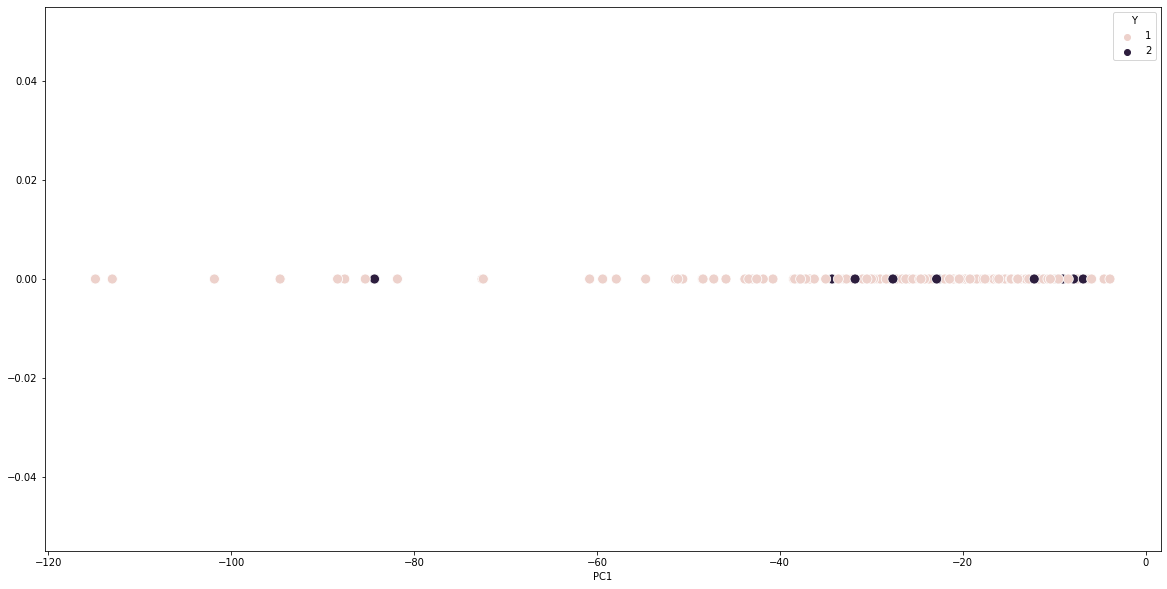

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=100)

Let’s now see how this looks in a 2D space:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


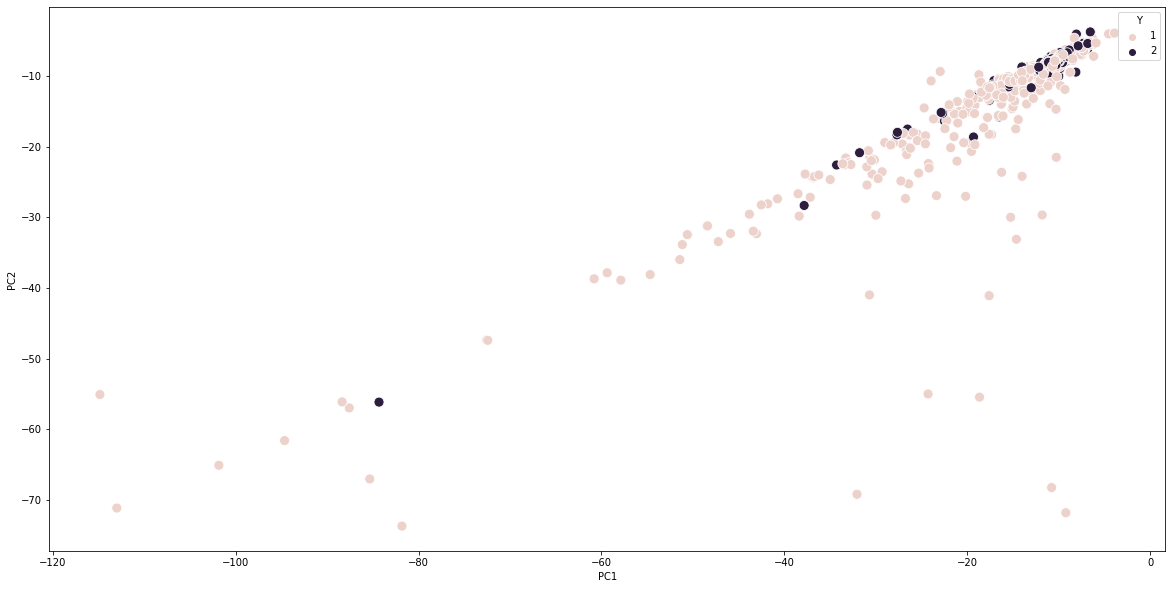

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)